<a href="https://colab.research.google.com/github/Fordreign/my_works/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D0%B0_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_(%D0%B2%D0%B5%D1%81%D0%BD%D0%B0_2021)(XGB_cl%2BCatBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сперва импортируем нужные нам библиотеки и взглянем на данные.

In [235]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [236]:
df = pd.read_csv('./drive/MyDrive/Colab_Notebooks/DATA/train.csv')

In [237]:
df.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
624,62,84.95,5150.55,Female,0,Yes,No,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Electronic check,0
3390,6,20.15,130.5,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),0
2221,1,69.95,69.95,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
718,11,20.90,202.3,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2895,1,44.90,44.9,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1
1285,18,20.10,401.85,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
4767,50,20.35,938.95,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
1200,12,19.20,239,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,0
1337,14,61.40,815.55,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,No,No,No,Yes,Two year,Yes,Bank transfer (automatic),0
1036,1,75.35,75.35,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [239]:
df.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Данные попались без пропусков в каждой колонке.

In [240]:
df['TotalSpent'] = pd.to_numeric(df['TotalSpent'], errors='coerce').fillna(0)
#Поменияем формат на числовой

In [241]:
type(df['TotalSpent'][2])
#проверили

numpy.float64

In [242]:
df.shape

(5282, 20)

In [243]:
df.nunique()

ClientPeriod                  73
MonthlySpending             1468
TotalSpent                  4978
Sex                            2
IsSeniorCitizen                2
HasPartner                     2
HasChild                       2
HasPhoneService                2
HasMultiplePhoneNumbers        3
HasInternetService             3
HasOnlineSecurityService       3
HasOnlineBackup                3
HasDeviceProtection            3
HasTechSupportAccess           3
HasOnlineTV                    3
HasMovieSubscription           3
HasContractPhone               3
IsBillingPaperless             2
PaymentMethod                  4
Churn                          2
dtype: int64

In [244]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [245]:
print(f"Duplicated rows: {df.duplicated(keep=False).sum()}")
print(f"Duplicated rows without target: {df.drop(target_col, axis=1).duplicated(keep=False).sum()}")

Duplicated rows: 28
Duplicated rows without target: 41


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [247]:
df.drop_duplicates(inplace=True) 
#Удалим повторяющиеся строки, они лишь "кинут палки под колеса" нашей "машины"

In [248]:
df.shape

(5268, 20)

Построим графики для более детального анализа наших признаков.

Гистрограммы численных признаков

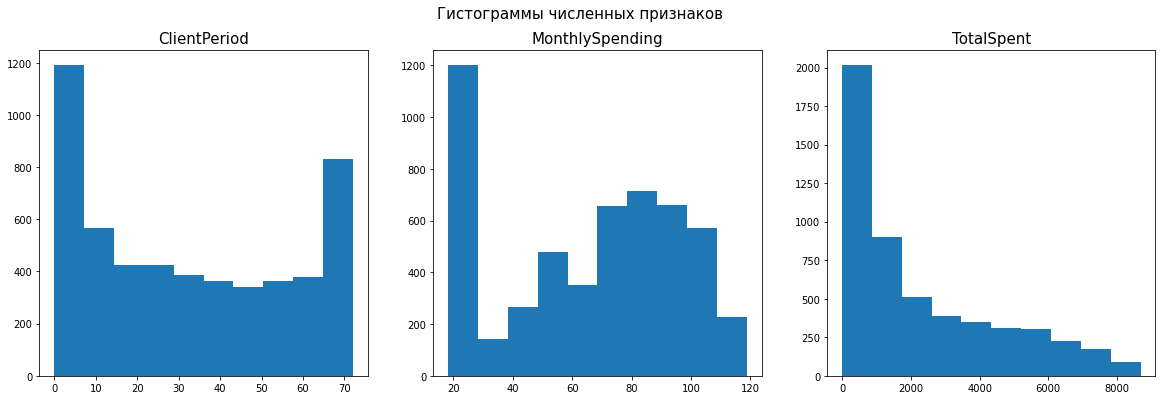

In [249]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Гистограммы численных признаков', fontsize=15)
for i, col in enumerate(num_cols):
    axes[i].hist(df[col])
    axes[i].set_title(col).set_fontsize(15)

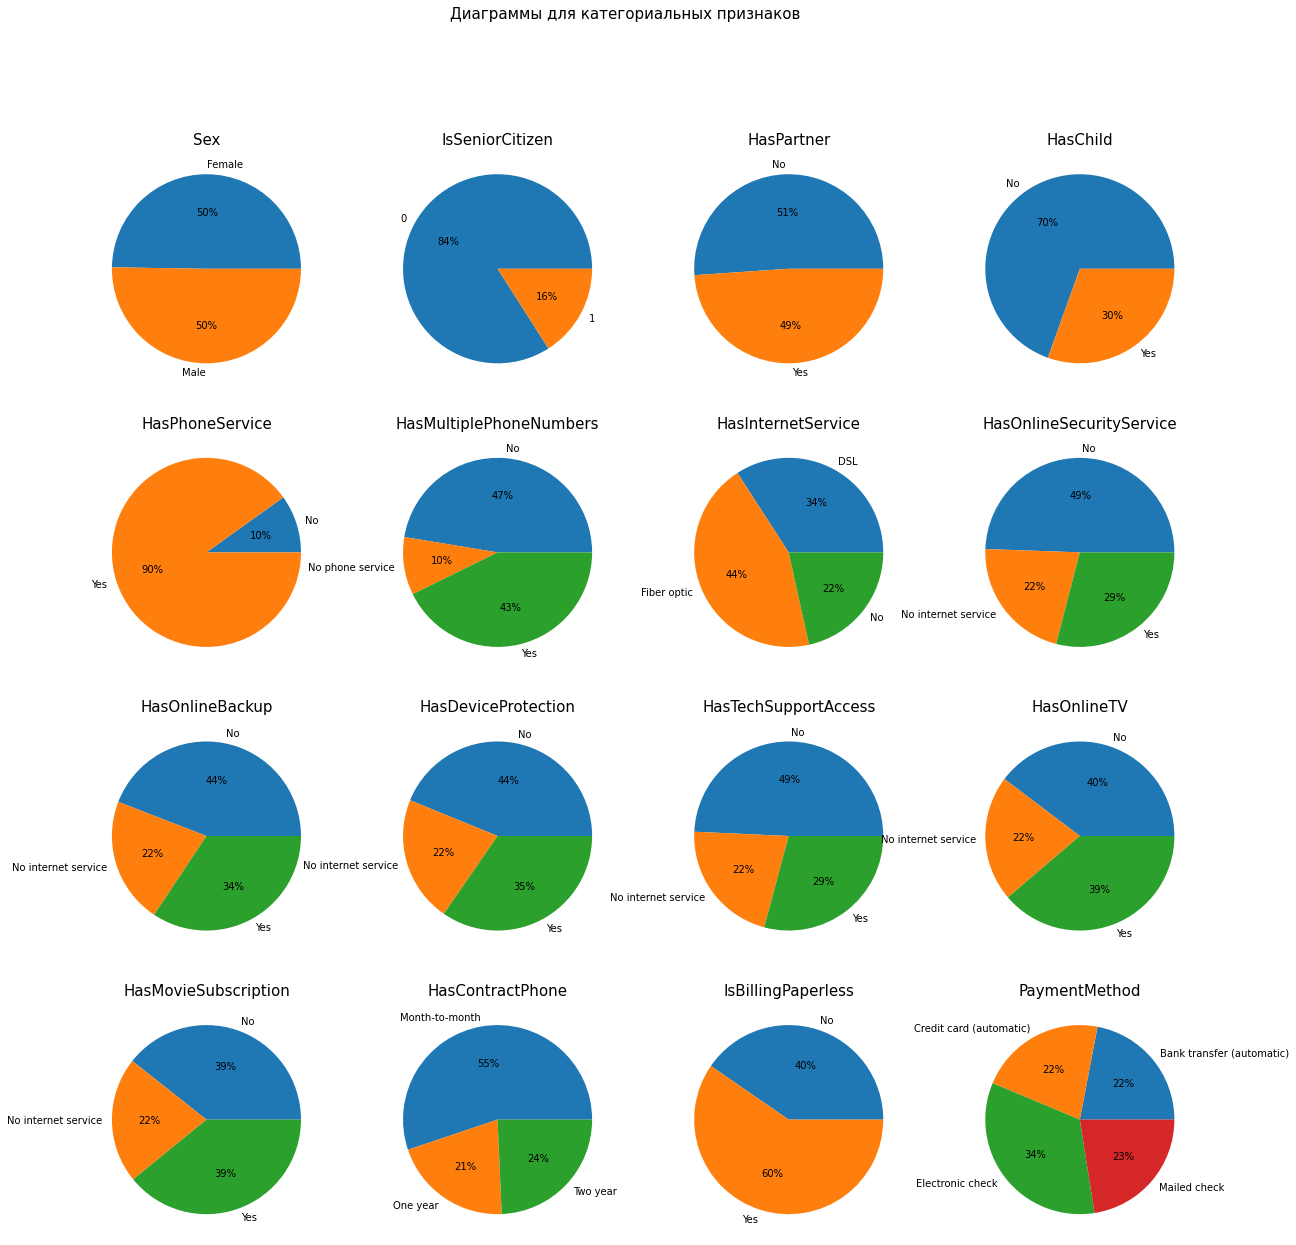

In [250]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Диаграммы для категориальных признаков', fontsize=15)
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    col_values = df.groupby(by=col).size()
    axes[i].pie(x=col_values, autopct='%.0f%%', labels=col_values.index)
    axes[i].set_title(col).set_fontsize(15)

In [251]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [252]:
X_train = df.drop(target_col, axis=1)
y_train = df[target_col]

In [253]:
data_norm = ColumnTransformer([
        ('num_cols', StandardScaler(), num_cols),
        ('cat_cols', OneHotEncoder(), cat_cols)
    ])

In [254]:
pline = make_pipeline(data_norm, LogisticRegression())

In [255]:
param_grid = {
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__max_iter': np.linspace(100, 300, 5)
}

gs = GridSearchCV(estimator=pline, param_grid=param_grid, scoring='roc_auc', refit=True, n_jobs=-1)
gs.fit(X_train, y_train);

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

In [256]:
print(gs.best_score_, gs.best_params_, sep='\n')

0.8445823520781085
{'logisticregression__C': 10, 'logisticregression__max_iter': 100.0, 'logisticregression__penalty': 'l2'}


Наша база это Линейная регрессия с roc-auc 0.845

In [257]:
import catboost
from sklearn.metrics import roc_auc_score

In [258]:
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=666)

In [259]:
model_catboost = catboost.CatBoostClassifier(cat_features=cat_cols, verbose=False)
model_catboost.fit(X_train, y_train);

In [260]:
predictions = model_catboost.predict_proba(X_valid)[:,-1]
roc_auc_score(y_valid, predictions)

0.831860444123488

CatBoost с оптимальными параметрами выдал roc-auc 0.853

In [ ]:
param_grid = {
    'num_trees': np.linspace(400, 1000, 50),
    'learning_rate': np.linspace(0.1, 1 , 5),
    'max_depth' : np.linspace(1,6,6)
}

cb_cv = catboost.CatBoostClassifier(cat_features=cat_cols, verbose=False)
GSCV_catboost = GridSearchCV(
   estimator=cb_cv,
   param_grid=param_grid,
   scoring='roc_auc',
   cv=5
)

GSCV_catboost.fit(X, y);

In [267]:
print(GSCV_catboost.best_score_, GSCV_catboost.best_params_, sep='\n')

0.8485428496711538
{'learning_rate': 0.1, 'max_depth': 1, 'num_trees': 400.0}


Выбираем лучшую модель catboost для baseline , так как она выдала самый лучший score(auc-roc).

Загружаем тестовые данные и делаем предсказание.

In [268]:
X_test = pd.read_csv('./drive/MyDrive/Colab_Notebooks/DATA/test.csv')

In [269]:
X_test.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [270]:
prediction = GSCV_catboost.best_estimator_.predict_proba(X_test)[:, 1]
submission = pd.read_csv('./drive/MyDrive/Colab_Notebooks/DATA/submission.csv')
submission['Churn'] = prediction

In [271]:
submission.shape

(1761, 2)

In [272]:
submission.head()

,Id,Churn
0,0,0.044738
1,1,0.678593
2,2,0.674332
3,3,0.011972
4,4,0.006076


In [273]:
submission.to_csv("./drive/MyDrive/Colab_Notebooks/DATA/submission.baseline_1.csv", index = False)
#Запишем ответ в csv

Мы не пробовали самый сильный алгоритм , а именно XGBoost.
Давайте реализуем его.

In [274]:
import xgboost as xgb


In [275]:
X = df.drop(target_col,axis=1)
y = df['Churn']

In [276]:
X = pd.get_dummies(X, columns=cat_cols); # оцифруем наши категориальные признаки.

In [277]:
X.shape

(5268, 46)

In [278]:
std = StandardScaler()
X[num_cols] = std.fit_transform(X[num_cols])
# Стандартизировали наши числовые значения

In [287]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=69)

In [288]:
xgb_cl = xgb.XGBClassifier(random_state=69)

In [289]:
xgb_cl.fit(X_train, y_train);

In [290]:
presdiction_xgb = xgb_cl.predict_proba(X_valid)[:, 1] # Делаем предсказания
roc_auc_score(y_valid, presdiction_xgb)

0.805028117308988

Наш baseline на XGBoost Cl 0.805

In [ ]:
param_grid = {
    'learning_rate': [.01,.05,.1],
    'max_depth' : [2,3,4],
    'n_estimators': range(300,700,200),
    'eta' : [.05,.1,.15]
}

xgb_cl_cv = xgb.XGBClassifier(random_state=2, verbose=False)

GSCV_xgb_cl = GridSearchCV(
   estimator=xgb_cl_cv,
   param_grid=param_grid,
   scoring = 'roc_auc',
   cv=5
)
GSCV_xgb_cl.fit(X_train,y_train)

In [302]:
print(GSCV_xgb_cl.best_score_, GSCV_xgb_cl.best_params_, sep='\n') # Находим лучшие гиперпараметры 

0.8515826596374316
{'eta': 0.05, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300}


In [308]:
presdiction_xgb = GSCV_xgb_cl.predict_proba(X_valid)[:, 1] # Делаем предсказания
roc_auc_score(y_valid, presdiction_xgb)

0.8243962913567346

In [309]:
submission = pd.read_csv('./drive/MyDrive/Colab_Notebooks/DATA/submission.csv')
submission['Churn'] = prediction

In [310]:
submission.to_csv("./drive/MyDrive/Colab_Notebooks/DATA/submission.xgb_cl.csv", index = False)
#Запишем ответ в csv